In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading our traning dataset
df = pd.read_csv("train.csv")

In [3]:
#changing column headers for simplicity 
lower = lambda x:x.lower()
under = lambda x:x.replace(" ","_")
df.columns = df.columns.map(lower)
df.columns = df.columns.map(under)

In [4]:
df.head()

,id,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision_(in_value),age,claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [5]:
df.drop("id", axis=1, inplace=True)

In [6]:
#Quick method done to check which columns are categorical number of categories they have.
for col in df.columns:
    print(df[col].value_counts())
    print("-"*25)

EPX    26218
C2B    10615
CWT     6813
JZI     4619
LWC      806
SSI      780
JWT      550
RAB      527
TST      394
KML      313
ART      223
CCR      156
TTW      104
CBH       76
CSR       60
ADM       56
Name: agency, dtype: int64
-------------------------
Travel Agency    34996
Airlines         17314
Name: agency_type, dtype: int64
-------------------------
Online     51419
Offline      891
Name: distribution_channel, dtype: int64
-------------------------
Cancellation Plan                       13254
2 way Comprehensive Plan                10555
Rental Vehicle Excess Insurance          6813
Bronze Plan                              4723
Basic Plan                               4042
Silver Plan                              2862
1 way Comprehensive Plan                 2409
Annual Silver Plan                       2348
Value Plan                               1961
Ticket Protector                          780
Travel Cruise Protect                     394
Gold Plan                   

In [7]:
#dividing column headers to two different lists so they can be used while looping.
cat_col = ["agency","agency_type","distribution_channel","product_name","destination","claim"]
num_col = [col for col in df.columns if col not in cat_col]

In [8]:
#removing negative values duration has 
df = df[df.duration>0]

### Agency and Product_name columns are categorical but have large number of unique categories so those categories were sorted with respect to their counts and top few categories were retained and rest were replaced by "other".

In [9]:
agency_other = []
for val in range(df.agency.nunique()):
    if df.agency.value_counts()[val] < 1000:
        agency_other.append(df.agency.value_counts().index[val])

In [10]:
df.agency = df.agency.map(lambda x:"other" if x in agency_other else x)

In [11]:
df.agency.value_counts()

EPX      26217
C2B      10612
CWT       6812
JZI       4607
other     4016
Name: agency, dtype: int64

In [12]:
product_other = []
for val in range(df.product_name.nunique()):
    if df.product_name.value_counts()[val] < 850:
        product_other.append(df.product_name.value_counts().index[val])

In [13]:
df.product_name = df.product_name.map(lambda x: "other" if x in product_other else x)

In [14]:
df.product_name.value_counts()

Cancellation Plan                  13254
2 way Comprehensive Plan           10555
Rental Vehicle Excess Insurance     6812
Bronze Plan                         4721
Basic Plan                          4030
other                               3328
Silver Plan                         2861
1 way Comprehensive Plan            2408
Annual Silver Plan                  2348
Value Plan                          1947
Name: product_name, dtype: int64

### The feature Destination is also a categorical column and had alot of categories not previous method didn't seem appropriate as the counts of the columns didn't drastically change. So 
### So the method used is "Frequency encoding", where the class is replaced with it's count.

In [15]:
dest_dict = df.destination.value_counts().to_dict()
df.destination = df.destination.map(dest_dict)

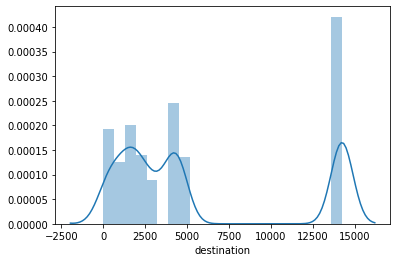

In [16]:
sns.distplot(df.destination)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52264 entries, 0 to 52309
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                52264 non-null  object 
 1   agency_type           52264 non-null  object 
 2   distribution_channel  52264 non-null  object 
 3   product_name          52264 non-null  object 
 4   duration              52264 non-null  int64  
 5   destination           52264 non-null  int64  
 6   net_sales             52264 non-null  float64
 7   commision_(in_value)  52264 non-null  float64
 8   age                   52264 non-null  int64  
 9   claim                 52264 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 4.4+ MB


In [18]:
import sys
sys.path.append("/home/harshal/greyatom/functions/")
#this is a function I wrote which given a dataset with all numeric columns will print classification
#   report and precision and recall score for Logistic Regression, Random Forest, Decision Tree and Gradient 
#      Boosting classification
from clas import clas

In [19]:
#the function just takes the dataframe and sorts X,y so target_col label is used to sort y.
df.rename(columns={"claim":"target_col"}, inplace=True)

In [20]:
df = pd.get_dummies(df, drop_first=True)

In [21]:
clas(df)

/home/harshal/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 
LogisticRegression
 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     13012
           1       0.63      0.24      0.35      2668

    accuracy                           0.85     15680
   macro avg       0.74      0.60      0.63     15680
weighted avg       0.82      0.85      0.82     15680

--------------------------------------------------
 
RandomForestClassifier
 
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     13012
           1       0.66      0.19      0.29      2668

    accuracy                           0.85     15680
   macro avg       0.76      0.58      0.60     15680
weighted avg       0.82      0.85      0.81     15680

--------------------------------------------------
 
DecisionTreeClassifier
 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     13012
           1       0.61      0.37      0.46      2668

   

,LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,GradientBoostingClassifier,AdaBoostClassifier,XGBoostClassifier
precision,0.63,0.66,0.61,0.68,0.62,0.76
recall,0.24,0.19,0.37,0.44,0.34,0.63


### XGBoost Classifer is giving best results amoung the other models with precision score = 0.76 on raw dataset with outliers

In [22]:
#making deep copy of dataset
wo_outliers = df.copy()

In [23]:
from outlier import winsor

In [24]:
#removing outliers from numeric columns
for col in num_col:
    wo_outliers = winsor(wo_outliers,col)

In [25]:
#checking shape to see whether number of rows are reduced as outliers are removed
wo_outliers.shape

(48662, 21)

In [26]:
#validating on dataset after removal of outliers
clas(wo_outliers)

 
LogisticRegression
 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     12438
           1       0.55      0.18      0.27      2161

    accuracy                           0.86     14599
   macro avg       0.71      0.58      0.59     14599
weighted avg       0.83      0.86      0.82     14599

--------------------------------------------------
 
RandomForestClassifier
 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12438
           1       0.68      0.11      0.19      2161

    accuracy                           0.86     14599
   macro avg       0.77      0.55      0.56     14599
weighted avg       0.84      0.86      0.81     14599

--------------------------------------------------
 
DecisionTreeClassifier
 
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     12438
           1       0.60      0.34      0.44      2161

   

,LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,GradientBoostingClassifier,AdaBoostClassifier,XGBoostClassifier
precision,0.55,0.68,0.60,0.68,0.59,0.78
recall,0.18,0.11,0.34,0.43,0.31,0.61


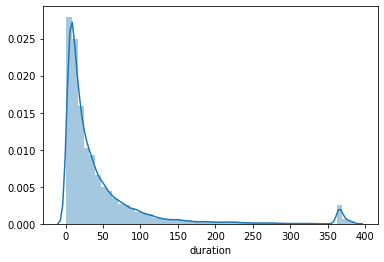

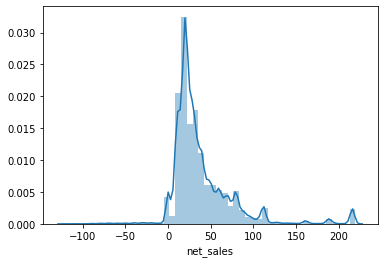

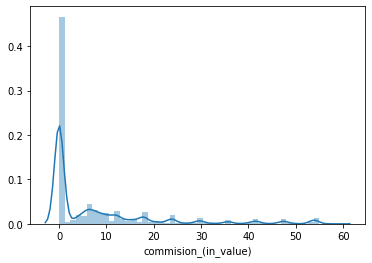

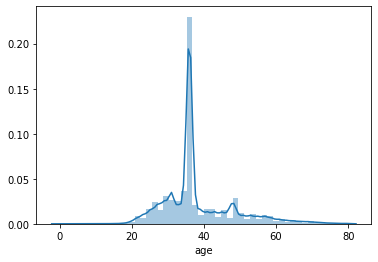

In [27]:
for col in num_col:
    sns.distplot(wo_outliers[col])
    plt.show()

### Random Oversampling with SMOTE

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [29]:
sm=SMOTE(sampling_strategy=0.25,random_state=10)

In [30]:
X = wo_outliers.drop("target_col",axis=1)
y = wo_outliers.target_col

In [31]:
y.value_counts(normalize=True)*100

0    84.922527
1    15.077473
Name: target_col, dtype: float64

In [33]:
X_res, y_res = sm.fit_resample(X, y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=0)

In [35]:
xgbc_res = XGBClassifier(max_depth=4)

In [36]:
xgbc_res.fit(X_train,y_train)
yres_pred = xgbc_res.predict(X_test)

In [37]:
print(f"Precision score for resampled data = {np.round(precision_score(y_test,yres_pred),3)}")

Precision score for resampled data = 0.8


In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yres_pred))

[[11844   554]
 [  880  2219]]


### Testing

In [39]:
#reading test data
test = pd.read_csv("test.csv")

In [40]:
test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [41]:
test.columns = test.columns.map(lower)
test.columns = test.columns.map(under)

In [42]:
Id = test.id
test.drop("id", axis=1, inplace=True)

In [43]:
cat_col = ["agency","agency_type","destination","distribution_channel","product_name","destination","claim"]
num_col = [col for col in test.columns if col not in cat_col]

In [44]:
agency_other = []
for val in range(test.agency.nunique()):
    if test.agency.value_counts()[val] < 1000:
        agency_other.append(test.agency.value_counts().index[val])
test.agency = test.agency.map(lambda x:"other" if x in agency_other else x)

In [45]:
product_other = []
for val in range(test.product_name.nunique()):
    if test.product_name.value_counts()[val] < 850:
        product_other.append(test.product_name.value_counts().index[val])
test.product_name = test.product_name.map(lambda x: "other" if x in product_other else x)

In [46]:
dest_dict = test.destination.value_counts().to_dict()
test.destination = test.destination.map(dest_dict)

In [47]:
test = pd.get_dummies(test, drop_first=True)

In [49]:
pred = xgbc_res.predict(test)

In [50]:
output = pd.DataFrame(data={"ID":Id, "Claim":pred})

In [51]:
output.set_index("ID", inplace=True)

In [52]:
output

,Claim
ID,
17631,0
15064,0
14139,0
19754,0
16439,0
...,...
13227,0
12767,0
13638,0


In [53]:
output.to_csv("submission_win.csv")